In [1]:
# Import necessary libraries
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon


In [2]:
# Path to your GeoJSON file (update this path if needed)
geojson_path = '/content/Repaired_Valid_Geometries.geojson'

# Load the GeoJSON file into a GeoDataFrame
valid_geometries_gdf = gpd.read_file(geojson_path)

# Display the first few rows to ensure the file loaded correctly
valid_geometries_gdf.head()


,County,geometry
0,Wahkiakum,"MULTIPOLYGON (((-123.72755 46.2645, -123.72656..."
1,Lewis,"MULTIPOLYGON (((-122.93223 46.38741, -123.3583..."
2,Jefferson,"MULTIPOLYGON (((-122.95296 48.2698, -122.95239..."
3,Columbia,"MULTIPOLYGON (((-118.24264 46.55975, -118.2280..."
4,Kittitas,"MULTIPOLYGON (((-120.00214 46.99732, -119.9658..."


In [4]:
# Display the first few rows of the GeoDataFrame
print(valid_geometries_gdf.head())

# Check the columns in the GeoDataFrame
print(valid_geometries_gdf.columns)

# Check the data type of the 'geometry' column
print(type(valid_geometries_gdf['geometry']))


      County                                           geometry
0  Wahkiakum  MULTIPOLYGON (((-123.72755 46.2645, -123.72656...
1      Lewis  MULTIPOLYGON (((-122.93223 46.38741, -123.3583...
2  Jefferson  MULTIPOLYGON (((-122.95296 48.2698, -122.95239...
3   Columbia  MULTIPOLYGON (((-118.24264 46.55975, -118.2280...
4   Kittitas  MULTIPOLYGON (((-120.00214 46.99732, -119.9658...
Index(['County', 'geometry'], dtype='object')
<class 'geopandas.geoseries.GeoSeries'>


In [5]:
# Reload the GeoJSON file and ensure the 'geometry' column is correctly interpreted
valid_geometries_gdf = gpd.read_file(geojson_path)

# Confirm if the 'geometry' column is valid
print(valid_geometries_gdf.dtypes)


County        object
geometry    geometry
dtype: object


In [6]:
# Print the first geometry to check its structure
print(valid_geometries_gdf['geometry'].iloc[0])


MULTIPOLYGON (((-123.727552 46.264495, -123.726557 46.384872, -123.21795 46.385617, -123.213054 46.172541, -123.280166 46.144843, -123.390404 46.154428, -123.430987 46.181571, -123.427629 46.229348, -123.479644 46.269131, -123.688115 46.250105, -123.727552 46.264495)))


In [7]:
# Check if all geometries are valid
validity = valid_geometries_gdf['geometry'].is_valid
print(f"Number of valid geometries: {validity.sum()}")
print(f"Number of invalid geometries: {len(validity) - validity.sum()}")


Number of valid geometries: 39
Number of invalid geometries: 0


In [25]:
# Create a list to store flattened polygons along with their County
flattened_data = []

# Iterate through the original GeoDataFrame
for idx, row in valid_geometries_gdf.iterrows():
    # Decompose MultiPolygon into individual Polygon components
    if isinstance(row.geometry, MultiPolygon):
        for poly in row.geometry.geoms:
            if poly.is_valid:
                flattened_data.append({'County': row['County'], 'geometry': poly})
    elif isinstance(row.geometry, Polygon):
        if row.geometry.is_valid:
            flattened_data.append({'County': row['County'], 'geometry': row.geometry})

# Create a new GeoDataFrame with flattened polygons and their County
flattened_gdf = gpd.GeoDataFrame(flattened_data, crs="EPSG:4326")


# Save the updated flattened GeoDataFrame (optional)
flattened_geojson_path = '/content/Flattened_Polygons_with_County.geojson'
flattened_gdf.to_file(flattened_geojson_path, driver="GeoJSON")
print(f"Flattened polygons with County saved at: {flattened_geojson_path}")


Flattened polygons with County saved at: /content/Flattened_Polygons_with_County.geojson


In [27]:
# Import necessary libraries
import geopandas as gpd

# Path to the Flattened Polygons GeoJSON file
flattened_geojson_path = '/content/Flattened_Polygons.geojson'  # Adjust to your uploaded file path

# Load the GeoJSON file into a GeoDataFrame
flattened_gdf = gpd.read_file(flattened_geojson_path)

# Display the first few rows to ensure it loaded correctly
print(flattened_gdf.head())


      County                                           geometry
0  Wahkiakum  POLYGON ((-123.72755 46.2645, -123.72656 46.38...
1      Lewis  POLYGON ((-122.93223 46.38741, -123.35833 46.3...
2  Jefferson  POLYGON ((-122.95296 48.2698, -122.95239 48.34...
3   Columbia  POLYGON ((-118.24264 46.55975, -118.22801 46.5...
4   Kittitas  POLYGON ((-120.00214 46.99732, -119.9658 46.94...


In [28]:
# Import pandas for loading the dataset
import pandas as pd

# Path to the EV charging station dataset
ev_stations_path = '/content/Cleaned_EV_Stations.csv'  # Replace with your file path

# Load the dataset (adjust column names as necessary)
ev_stations_df = pd.read_csv(ev_stations_path)

# Display the first few rows of the EV charging station dataset
print(ev_stations_df.head())


       ID  AddressInfo.Latitude  AddressInfo.Longitude AddressInfo.Town  \
0   62498             47.609576            -122.202297         Bellevue   
1  249639             47.611006            -122.202167         Bellevue   
2  280528             47.610983            -122.202236         Bellevue   
3  235009             47.611826            -122.201331         Bellevue   
4   92538             47.612213            -122.198039         Bellevue   

  AddressInfo.StateOrProvince  NumberOfPoints  
0                          WA               0  
1                          WA               0  
2                          WA               8  
3                          WA               0  
4                  Washington               2  


In [29]:
# Display the column names in the dataset
print(ev_stations_df.columns)


Index(['ID', 'AddressInfo.Latitude', 'AddressInfo.Longitude',
       'AddressInfo.Town', 'AddressInfo.StateOrProvince', 'NumberOfPoints'],
      dtype='object')


In [30]:
# Rename the latitude and longitude columns
ev_stations_df.rename(columns={
    'AddressInfo.Latitude': 'latitude',
    'AddressInfo.Longitude': 'longitude'
}, inplace=True)

# Display the first few rows to confirm the changes
print(ev_stations_df.head())


       ID   latitude   longitude AddressInfo.Town AddressInfo.StateOrProvince  \
0   62498  47.609576 -122.202297         Bellevue                          WA   
1  249639  47.611006 -122.202167         Bellevue                          WA   
2  280528  47.610983 -122.202236         Bellevue                          WA   
3  235009  47.611826 -122.201331         Bellevue                          WA   
4   92538  47.612213 -122.198039         Bellevue                  Washington   

   NumberOfPoints  
0               0  
1               0  
2               8  
3               0  
4               2  


In [31]:
# Convert EV charging station data to a GeoDataFrame
ev_stations_gdf = gpd.GeoDataFrame(
    ev_stations_df,
    geometry=gpd.points_from_xy(ev_stations_df['longitude'], ev_stations_df['latitude']),
    crs="EPSG:4326"  # Set CRS to WGS 84
)

# Display the GeoDataFrame
print(ev_stations_gdf.head())


       ID   latitude   longitude AddressInfo.Town AddressInfo.StateOrProvince  \
0   62498  47.609576 -122.202297         Bellevue                          WA   
1  249639  47.611006 -122.202167         Bellevue                          WA   
2  280528  47.610983 -122.202236         Bellevue                          WA   
3  235009  47.611826 -122.201331         Bellevue                          WA   
4   92538  47.612213 -122.198039         Bellevue                  Washington   

   NumberOfPoints                     geometry  
0               0   POINT (-122.2023 47.60958)  
1               0  POINT (-122.20217 47.61101)  
2               8  POINT (-122.20224 47.61098)  
3               0  POINT (-122.20133 47.61183)  
4               2  POINT (-122.19804 47.61221)  


In [32]:
# Load the Flattened Polygons GeoJSON file
flattened_geojson_path = '/content/Flattened_Polygons.geojson'  # Replace with your file path
flattened_gdf = gpd.read_file(flattened_geojson_path)

# Display the first few rows to ensure it loaded correctly
print(flattened_gdf.head())


      County                                           geometry
0  Wahkiakum  POLYGON ((-123.72755 46.2645, -123.72656 46.38...
1      Lewis  POLYGON ((-122.93223 46.38741, -123.35833 46.3...
2  Jefferson  POLYGON ((-122.95296 48.2698, -122.95239 48.34...
3   Columbia  POLYGON ((-118.24264 46.55975, -118.22801 46.5...
4   Kittitas  POLYGON ((-120.00214 46.99732, -119.9658 46.94...


In [33]:
# Perform a spatial join between charging stations and polygons
spatial_join_gdf = gpd.sjoin(ev_stations_gdf, flattened_gdf, how="inner", predicate="within")

# Display the first few rows of the joined data
print(spatial_join_gdf.head())


       ID   latitude   longitude AddressInfo.Town AddressInfo.StateOrProvince  \
0   62498  47.609576 -122.202297         Bellevue                          WA   
1  249639  47.611006 -122.202167         Bellevue                          WA   
2  280528  47.610983 -122.202236         Bellevue                          WA   
3  235009  47.611826 -122.201331         Bellevue                          WA   
4   92538  47.612213 -122.198039         Bellevue                  Washington   

   NumberOfPoints                     geometry  index_right County  
0               0   POINT (-122.2023 47.60958)           20   King  
1               0  POINT (-122.20217 47.61101)           20   King  
2               8  POINT (-122.20224 47.61098)           20   King  
3               0  POINT (-122.20133 47.61183)           20   King  
4               2  POINT (-122.19804 47.61221)           20   King  


In [34]:
print(spatial_join_gdf.columns)


Index(['ID', 'latitude', 'longitude', 'AddressInfo.Town',
       'AddressInfo.StateOrProvince', 'NumberOfPoints', 'geometry',
       'index_right', 'County'],
      dtype='object')


In [35]:
# Merge polygon attributes back into the spatial join GeoDataFrame
spatial_join_gdf = spatial_join_gdf.merge(flattened_gdf[['geometry']], left_on='index_right', right_index=True)

# Display the first few rows to confirm the merge
print(spatial_join_gdf.head())


       ID   latitude   longitude AddressInfo.Town AddressInfo.StateOrProvince  \
0   62498  47.609576 -122.202297         Bellevue                          WA   
1  249639  47.611006 -122.202167         Bellevue                          WA   
2  280528  47.610983 -122.202236         Bellevue                          WA   
3  235009  47.611826 -122.201331         Bellevue                          WA   
4   92538  47.612213 -122.198039         Bellevue                  Washington   

   NumberOfPoints                   geometry_x  index_right County  \
0               0   POINT (-122.2023 47.60958)           20   King   
1               0  POINT (-122.20217 47.61101)           20   King   
2               8  POINT (-122.20224 47.61098)           20   King   
3               0  POINT (-122.20133 47.61183)           20   King   
4               2  POINT (-122.19804 47.61221)           20   King   

                                          geometry_y  
0  POLYGON ((-122.00035 47.77539, -12

In [36]:
# Group by polygons (e.g., County) and count charging stations
if 'County' in spatial_join_gdf.columns:
    station_counts = spatial_join_gdf.groupby('County').size().reset_index(name='Charging_Station_Count')
    print(station_counts)
else:
    print("Column 'County' not found after merge. Check polygon attributes.")


          County  Charging_Station_Count
0         Chelan                       5
1        Clallam                      28
2        Douglas                       3
3          Grant                       2
4   Grays Harbor                       1
5         Island                      14
6      Jefferson                      19
7           King                     799
8         Kitsap                      67
9       Kittitas                      20
10         Lewis                      11
11         Mason                       9
12        Pierce                     155
13      San Juan                      19
14        Skagit                      43
15     Snohomish                     137
16      Thurston                      87
17       Whatcom                      51
18        Yakima                      25


<ipython-input-37-b64a443af6ac>:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


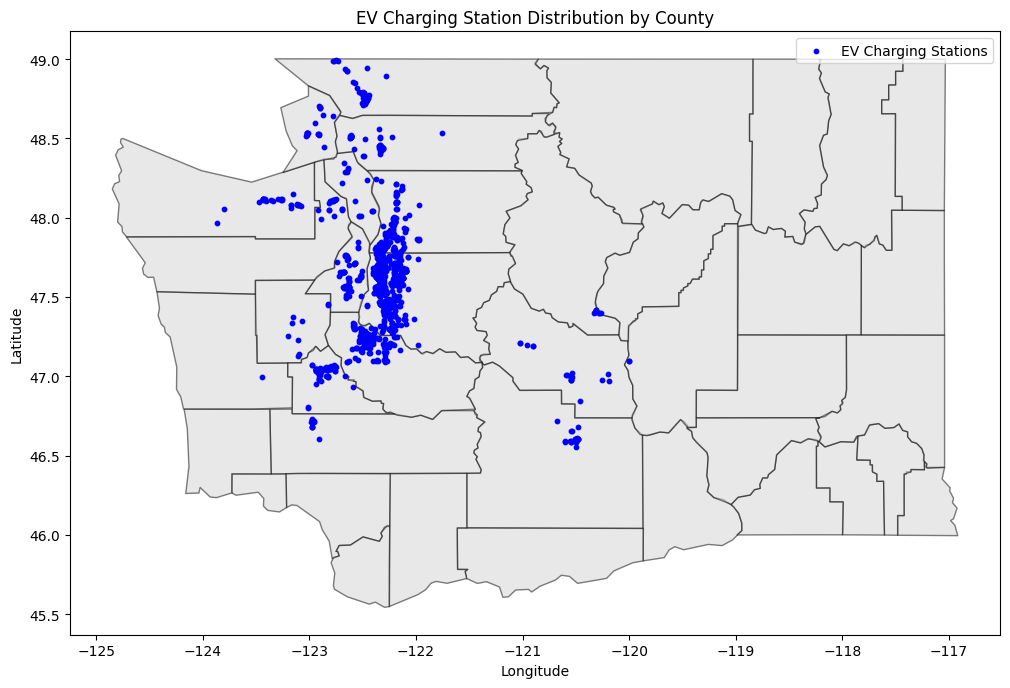

In [37]:
import matplotlib.pyplot as plt

# Plot the county polygons
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
flattened_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label="Counties")

# Plot the EV charging stations
ev_stations_gdf.plot(ax=ax, color='blue', markersize=10, label="EV Charging Stations")

# Add a legend
plt.legend()
plt.title("EV Charging Station Distribution by County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [38]:
# Filter counties with fewer than a threshold (e.g., 5 charging stations)
low_coverage = station_counts[station_counts['Charging_Station_Count'] < 5]

# Display the counties with low coverage
print("Counties with low coverage:")
print(low_coverage)


Counties with low coverage:
         County  Charging_Station_Count
2       Douglas                       3
3         Grant                       2
4  Grays Harbor                       1


In [41]:
# Load the demographic data (adjust path)
demographic_path = '/content/final_cleaned_data.csv'
demographics_df = pd.read_csv(demographic_path)

# Merge demographic data with the county polygons
flattened_gdf = flattened_gdf.merge(demographics_df, on='County', how='left')

# Check the merged dataset
print(flattened_gdf.head())


      County                                         geometry_x  Population  \
0  Wahkiakum  POLYGON ((-123.72755 46.2645, -123.72656 46.38...        4573   
1      Lewis  POLYGON ((-122.93223 46.38741, -123.35833 46.3...       83925   
2  Jefferson  POLYGON ((-122.95296 48.2698, -122.95239 48.34...       33313   
3   Columbia  POLYGON ((-118.24264 46.55975, -118.22801 46.5...        3996   
4   Kittitas  POLYGON ((-120.00214 46.99732, -119.9658 46.94...       44736   

   Median_Income                                         geometry_y  
0        57091.0  POLYGON ((-123.727552 46.264495, -123.726557 4...  
1        67169.0  POLYGON ((-122.932234 46.387406, -123.358334 4...  
2        71143.0  POLYGON ((-122.952955 48.269798, -122.952386 4...  
3        71528.0  POLYGON ((-118.24264 46.559747, -118.228013 46...  
4        69928.0  POLYGON ((-120.002143 46.99732, -119.965804 46...  


In [42]:
# Save the county polygons with demographic data into the GeoPackage
geodatabase_path = '/content/EV_Geodatabase.gpkg'

# Save the counties with demographic data
flattened_gdf.to_file(geodatabase_path, layer='Counties_With_Demographics', driver='GPKG')

# Save the EV charging stations
ev_stations_gdf.to_file(geodatabase_path, layer='EV_Charging_Stations', driver='GPKG')

print(f"Geodatabase created at: {geodatabase_path}")


Geodatabase created at: /content/EV_Geodatabase.gpkg


In [43]:
# Load the Counties_With_Demographics layer from the GeoPackage
geodatabase_path = '/content/EV_Geodatabase.gpkg'
counties_gdf = gpd.read_file(geodatabase_path, layer='Counties_With_Demographics')

# Display the first few rows
print(counties_gdf.head())

# Check the columns in the dataset
print(counties_gdf.columns)


      County  Population  Median_Income  \
0  Wahkiakum        4573        57091.0   
1      Lewis       83925        67169.0   
2  Jefferson       33313        71143.0   
3   Columbia        3996        71528.0   
4   Kittitas       44736        69928.0   

                                          geometry_y  \
0  POLYGON ((-123.727552 46.264495, -123.726557 4...   
1  POLYGON ((-122.932234 46.387406, -123.358334 4...   
2  POLYGON ((-122.952955 48.269798, -122.952386 4...   
3  POLYGON ((-118.24264 46.559747, -118.228013 46...   
4  POLYGON ((-120.002143 46.99732, -119.965804 46...   

                                            geometry  
0  POLYGON ((-123.72755 46.2645, -123.72656 46.38...  
1  POLYGON ((-122.93223 46.38741, -123.35833 46.3...  
2  POLYGON ((-122.95296 48.2698, -122.95239 48.34...  
3  POLYGON ((-118.24264 46.55975, -118.22801 46.5...  
4  POLYGON ((-120.00214 46.99732, -119.9658 46.94...  
Index(['County', 'Population', 'Median_Income', 'geometry_y', 'geometry'],

In [44]:
# Summary statistics for demographic attributes
print(counties_gdf[['Population', 'Median_Income']].describe())


         Population  Median_Income
count  3.900000e+01      39.000000
mean   1.984868e+05   76298.820513
std    4.013804e+05   14865.068437
min    2.326000e+03   52893.000000
25%    2.275300e+04   67195.000000
50%    6.696800e+04   71528.000000
75%    1.703155e+05   84024.000000
max    2.262713e+06  120824.000000


In [47]:
# Check the range of Population and Median_Income
print("Population Range:")
print(counties_gdf['Population'].describe())

print("Median Income Range:")
print(counties_gdf['Median_Income'].describe())


Population Range:
count    3.900000e+01
mean     1.984868e+05
std      4.013804e+05
min      2.326000e+03
25%      2.275300e+04
50%      6.696800e+04
75%      1.703155e+05
max      2.262713e+06
Name: Population, dtype: float64
Median Income Range:
count        39.000000
mean      76298.820513
std       14865.068437
min       52893.000000
25%       67195.000000
50%       71528.000000
75%       84024.000000
max      120824.000000
Name: Median_Income, dtype: float64


In [48]:
# Filter counties with low population and low income based on adjusted thresholds
low_resource_counties = counties_gdf[
    (counties_gdf['Population'] < 22750) &
    (counties_gdf['Median_Income'] < 67195)
]

# Display the filtered counties
print(low_resource_counties[['County', 'Population', 'Median_Income']])



          County  Population  Median_Income
0      Wahkiakum        4573        57091.0
12  Pend Oreille       13811        63750.0
16         Ferry        7326        54650.0
19      Garfield        2326        62411.0
28         Adams       20690        65042.0


<ipython-input-49-5223412bfa36>:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-49-5223412bfa36>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


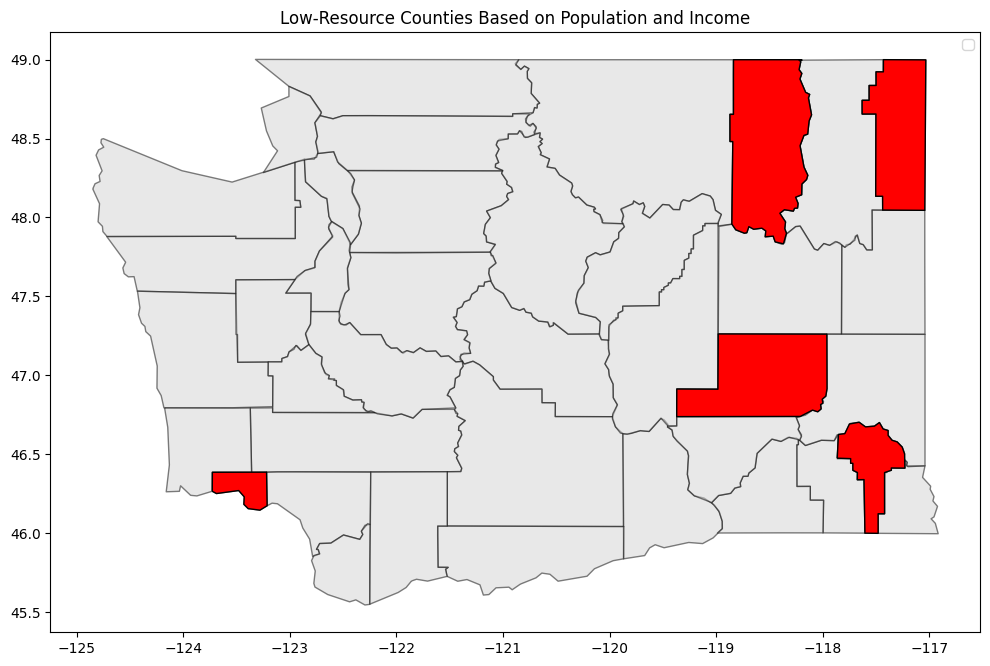

In [49]:
# Plot all counties
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
counties_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label="All Counties")

# Highlight low-resource counties
low_resource_counties.plot(ax=ax, color='red', edgecolor='black', label="Low-Resource Counties")

# Add title and legend
plt.legend()
plt.title("Low-Resource Counties Based on Population and Income")
plt.show()


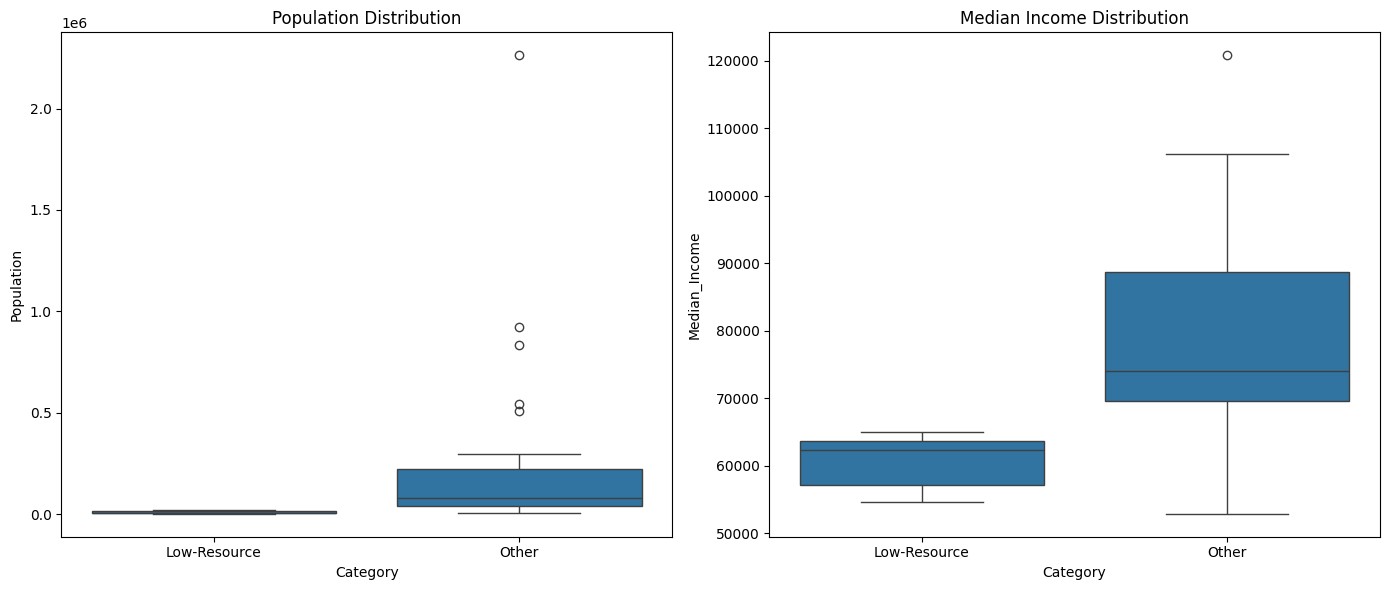

In [50]:
import seaborn as sns

# Combine labels for boxplot
counties_gdf['Category'] = counties_gdf['County'].apply(
    lambda x: 'Low-Resource' if x in low_resource_counties['County'].values else 'Other'
)

# Create boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=counties_gdf, x='Category', y='Population', ax=axes[0])
axes[0].set_title('Population Distribution')

sns.boxplot(data=counties_gdf, x='Category', y='Median_Income', ax=axes[1])
axes[1].set_title('Median Income Distribution')

plt.tight_layout()
plt.show()


In [53]:
# Check the charging station counts
print(station_counts.head(49))


          County  Charging_Station_Count
0         Chelan                       5
1        Clallam                      28
2        Douglas                       3
3          Grant                       2
4   Grays Harbor                       1
5         Island                      14
6      Jefferson                      19
7           King                     799
8         Kitsap                      67
9       Kittitas                      20
10         Lewis                      11
11         Mason                       9
12        Pierce                     155
13      San Juan                      19
14        Skagit                      43
15     Snohomish                     137
16      Thurston                      87
17       Whatcom                      51
18        Yakima                      25


In [54]:
 # Merge charging station counts into the county GeoDataFrame
counties_gdf = counties_gdf.merge(station_counts, on='County', how='left')

# Fill NaN values with 0 for counties with no charging stations
counties_gdf['Charging_Station_Count'] = counties_gdf['Charging_Station_Count'].fillna(0)

# Verify the merged dataset
print(counties_gdf[['County', 'Charging_Station_Count']].head())


      County  Charging_Station_Count
0  Wahkiakum                     0.0
1      Lewis                    11.0
2  Jefferson                    19.0
3   Columbia                     0.0
4   Kittitas                    20.0


In [55]:
# Calculate correlation between demographics and charging stations
correlation = counties_gdf[['Population', 'Median_Income', 'Charging_Station_Count']].corr()
print("Correlation Matrix:")
print(correlation)



Correlation Matrix:
                        Population  Median_Income  Charging_Station_Count
Population                1.000000       0.719703                0.929329
Median_Income             0.719703       1.000000                0.628738
Charging_Station_Count    0.929329       0.628738                1.000000
